In [63]:
#EnFk

In [64]:
# def declineCurve(m,t):
#     qi = m[0]
#     a = m[1]
#     b = m[2]
#     return qi/(1+a*b*t)**(1.0/b)
# def runEnsemble(mf,t,ne,nt,nm,m_range):
#     m_a = copy.deepcopy(mf)
#     for i in range(nm):
#         m_a[i,:] = m_range[i][0] + m_a[i,:]*(m_range[i][1]-m_range[i][0])
#     df = np.zeros((nt,ne))
#     for j in range(ne):
#         df[:,j] = declineCurve(m_a[:,j],t)
#     return m_a, df

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dcapy.dca import Arps, arps_forecast
from datetime import date

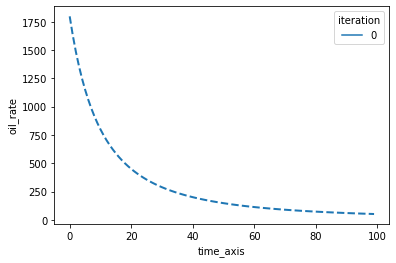

In [66]:
rng = np.random.default_rng(1706)
ne = 96 #number of ensemble
nt = 100 #timestep
nm = 3 # Model Parameters

tmax = 100
t = np.arange(tmax)
qi = 1800
di = 0.1
b = 0.5
true_params = np.array([qi,di,b])
dc1 = Arps(
    qi=qi,
    di=di,
    b = b,
    ti = 0
)

dc1.plot(
    start=0,
    end = tmax,
    freq_input='M',
    freq_output='M'
)

In [67]:
fr = dc1.forecast(
    start=0,
    end = 100,
    freq_input='M',
    freq_output='M'
)
fr.shape

(100, 4)

In [68]:
sd = fr['oil_rate']*0.3
sd

date
0     540.000000
1     489.795918
2     446.280992
3     408.317580
4     375.000000
         ...    
95     16.332703
96     16.052319
97     15.779093
98     15.512784
99     15.253160
Name: oil_rate, Length: 100, dtype: float64

In [69]:
noise = rng.standard_normal(size=(fr.shape[0],))


In [70]:
fr['obs'] = fr['oil_rate'].values + noise * sd

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

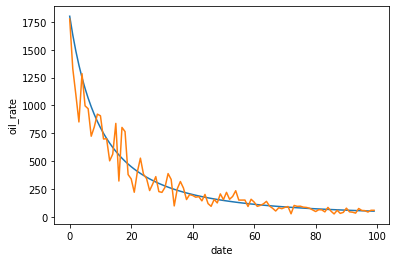

In [71]:
fig, ax = plt.subplots()
sns.lineplot(data=fr, x = fr.index, y=fr['oil_rate'],ax=ax)
sns.lineplot(data=fr, x = fr.index, y=fr['obs'],ax=ax)

In [72]:
true_params

array([1.8e+03, 1.0e-01, 5.0e-01])

In [73]:
def create_ensambles(n_ensambles,n_params,ranges):
    mf = rng.uniform(0.0,1.0, size=(n_params,n_ensambles))
    ma = np.zeros((n_params,n_ensambles))
    for i in range(n_params):
        range_diff = ranges[i][1] - ranges[i][0]
        ma[i,:] = ranges[i][0] + mf[i,:]*range_diff
        
    return ma
        
    

In [74]:
ne

96

In [75]:
m_range = [[1500,2000.0],[0.01,0.3],[1e-5,1.0]]
ens = create_ensambles(ne,len(m_range),m_range)
ens.T

array([[1.66280477e+03, 7.87756004e-02, 1.24617792e-01],
       [1.74367210e+03, 4.43988324e-02, 7.21306433e-01],
       [1.54557896e+03, 1.20438024e-02, 9.70949493e-01],
       [1.72394801e+03, 8.51738412e-02, 1.25569643e-01],
       [1.82915554e+03, 4.43702760e-02, 5.81487824e-01],
       [1.72320553e+03, 2.18113738e-01, 9.37865648e-01],
       [1.84698659e+03, 1.53738611e-01, 7.79543979e-01],
       [1.73313822e+03, 1.42935063e-01, 5.38698256e-01],
       [1.56436697e+03, 1.43220968e-01, 7.01638825e-01],
       [1.73817022e+03, 2.05337028e-01, 8.17567507e-01],
       [1.95975468e+03, 2.43057158e-01, 4.46870521e-01],
       [1.83135461e+03, 5.06864061e-02, 5.53277271e-01],
       [1.81248829e+03, 1.38750006e-01, 5.91291328e-02],
       [1.94030828e+03, 1.58756583e-01, 2.76990256e-01],
       [1.51805018e+03, 1.93237471e-01, 8.66175179e-01],
       [1.97300355e+03, 1.49775443e-01, 6.21709286e-01],
       [1.64387060e+03, 2.24861253e-01, 3.09885033e-01],
       [1.69124703e+03, 2.76201

In [76]:
    
def forward(ensambles,tmax):
    tt = np.arange(tmax)
    ne = ensambles.shape[1]
    curves = np.zeros((tmax,ne))

    for i,en in enumerate(ensambles.T):
        curves[:,i] = arps_forecast(tt,*en)
    
    # for i in range(ne):
    #     curves[:,i] = arps_forecast(tt,*ensambles[:,i])
    
    return pd.DataFrame(curves,columns=np.arange(ne))
    
df = forward(ens,tmax)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1662.804774,1743.672095,1545.578964,1723.948011,1829.155536,1723.205532,1846.986587,1733.138219,1564.366968,1738.170223,...,1873.064341,1718.051305,1614.740182,1902.996594,1841.546128,1547.820575,1655.451991,1772.590371,1879.376940,1633.346233
1,1537.433320,1669.110039,1527.182672,1583.908348,1750.754545,1413.035792,1597.362204,1510.188549,1364.800038,1437.660114,...,1661.127950,1413.722700,1269.398077,1638.538238,1499.205691,1187.185589,1510.331127,1549.892503,1670.884401,1438.607277
2,1422.593057,1599.871805,1509.213013,1456.542786,1677.538585,1195.419317,1402.040875,1328.496671,1204.986323,1219.863494,...,1488.744703,1200.428036,1022.218487,1417.553960,1234.137565,951.247068,1379.763173,1366.814255,1500.027991,1278.988614
3,1317.310452,1535.433661,1491.655386,1340.589125,1609.049813,1034.547423,1245.515504,1178.384389,1074.592901,1055.416192,...,1346.072054,1042.698955,839.535110,1231.855939,1026.113104,786.444662,1262.110145,1214.470689,1357.775958,1146.289420
4,1220.710038,1475.336725,1474.495846,1234.922104,1544.880489,910.924459,1117.593104,1052.867959,966.511466,927.255554,...,1226.241917,921.361496,700.902665,1074.983499,860.863145,665.687693,1155.937975,1086.337016,1237.728193,1034.606511


   index en         rate
0      0  0  1662.804774
1      1  0  1537.433320
2      2  0  1422.593057
3      3  0  1317.310452
4      4  0  1220.710038


<AxesSubplot:xlabel='index', ylabel='rate'>

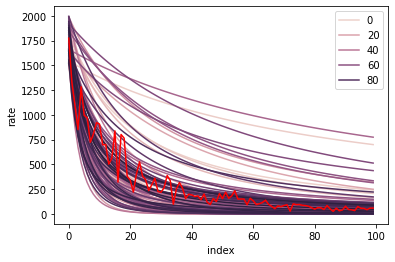

In [77]:
df_melt = df.reset_index().melt(id_vars='index',var_name='en',value_name='rate')
print(df_melt.head())

fig, ax = plt.subplots()
sns.lineplot(data=df_melt, x='index',y='rate', hue='en',ax=ax)
sns.lineplot(data=fr, x = fr.index, y=fr['obs'],ax=ax,color='red')

In [82]:
nd = 1
ind_hist = 99

ens_use = ens.copy()

fig, ax = plt.subplots(5,5,figsize=(15,15))
ax = ax.flatten()
c=0
for i in range(ind_hist):
    d_obs_i = fr['obs'].iloc[i].reshape(1,1)
    df_all = forward(ens_use,tmax)
    dfi = df_all.iloc[i,:].values.reshape((1,ne))
    m_b = ens_use.mean(axis=1).reshape((3,1)) #mean ensable props
    d_b = dfi.mean(axis=1) #Mean timestep i in all ensembles
    m_e = ens_use - m_b # difference ensemble and mean of ensembles
    d_e = dfi - d_b # difference sim data timestep all ensembles and its mean
    
    #3x500 500x1
    cmd = np.matmul(m_e,d_e.T)/(ne-1)
    
    #1x500 500x1
    cdd = np.matmul(d_e,d_e.T)/(ne-1)
    
    #kalman Gain 3X1
    # k_gain = cmd/(np.square(sd.iloc[i])+cdd[0,0])
    k_gain = cmd/(np.square(sd.iloc[i])+cmd)
    epsi = rng.standard_normal((1,1))*sd.iloc[i]
    
    #3x1 1x500
    ens_use = ens_use + np.matmul(k_gain,d_obs_i+epsi-dfi)
    
    if i%4==0:
        df_melt = df_all.reset_index().melt(id_vars='index',var_name='en',value_name='rate')
        sns.lineplot(data=df_melt, x='index',y='rate', hue='en',ax=ax[c],legend=False) 
        sns.lineplot(data=fr, x = fr.index, y=fr['obs'],ax=ax[c],color='red')
        ax[c].set_title(f'{i}')
        c+=1
    



SyntaxError: invalid syntax (<ipython-input-82-6484897a8bad>, line 27)

In [79]:
ens_df = pd.DataFrame(
    np.concatenate((ens.T,ens_use.T),axis=0),
    columns=['qi','di','b']
)
ens_df.loc[0:ne-1,'type'] = 'initial'
ens_df.loc[ne:,'type'] = 'final'
ens_df.reset_index(inplace=True)
ens_df_melt = ens_df.melt(
    id_vars=['index','type'],
    value_vars=['qi','di','b'],
    value_name='values',
    var_name='props'
)
ens_df_melt

,index,type,props,values
0,0,initial,qi,1662.804774
1,1,initial,qi,1743.672095
2,2,initial,qi,1545.578964
3,3,initial,qi,1723.948011
4,4,initial,qi,1829.155536
...,...,...,...,...
571,187,final,b,0.527129
572,188,final,b,0.455712
573,189,final,b,0.461036
574,190,final,b,0.496380


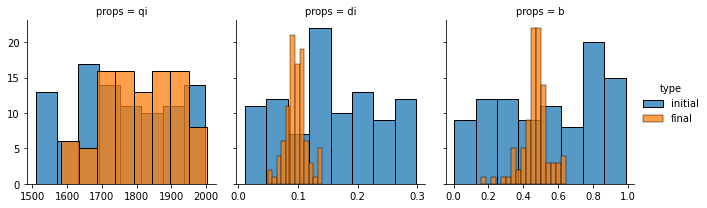

In [80]:
g = sns.FacetGrid(
    data = ens_df_melt,
    col='props',
    hue = 'type',
    sharex=False
)
g.map_dataframe(sns.histplot,x='values')
g.add_legend()